In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


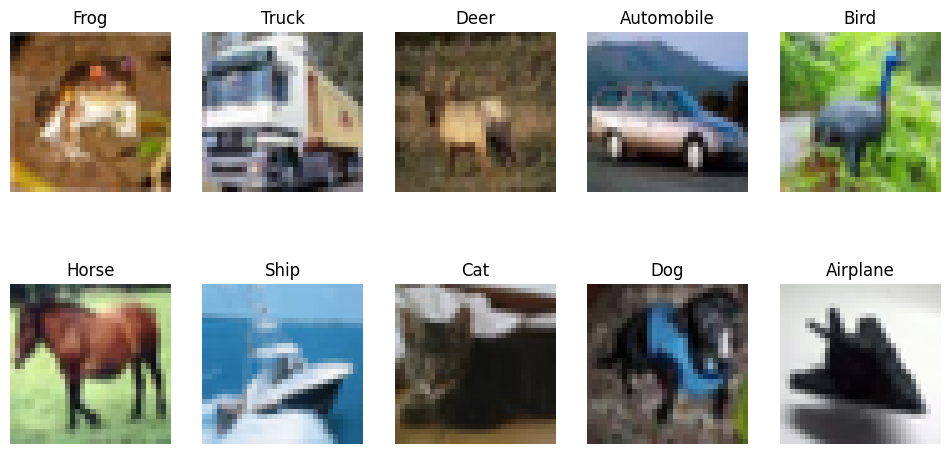

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (_, _) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Find one example image for each class
unique_classes = {}
for img, label in zip(x_train, y_train):
    label = label[0]  # Convert label to scalar
    if label not in unique_classes:
        unique_classes[label] = img
    if len(unique_classes) == len(class_names):  # Stop once we have one image per class
        break

# Plot one image per class
plt.figure(figsize=(12, 6))
for idx, (label, image) in enumerate(unique_classes.items()):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis('off')

plt.show()


In [3]:
# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# # Resize images to fit pre-trained models (224x224 for most ImageNet models)
# x_train_resized = tf.image.resize(x_train, [224, 224])
# x_test_resized = tf.image.resize(x_test, [224, 224])

x_train_resized = x_train
x_test_resized = x_test


In [6]:
def build_model(base_model_class, input_shape=(32, 32, 3), num_classes=10, trainable_layers=20):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze all layers except the last 'trainable_layers'
    for layer in base_model.layers[:-trainable_layers]:
        layer.trainable = False

    # Add new layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [7]:
# VGG16
vgg16_model = build_model(VGG16)
vgg16_model.fit(x_train_resized, y_train, epochs=5, validation_data=(x_test_resized, y_test), batch_size=32)

# ResNet50
resnet50_model = build_model(ResNet50)
resnet50_model.fit(x_train_resized, y_train, epochs=5, validation_data=(x_test_resized, y_test), batch_size=32)

# DenseNet121
densenet_model = build_model(DenseNet121)
densenet_model.fit(x_train_resized, y_train, epochs=5, validation_data=(x_test_resized, y_test), batch_size=32)

# EfficientNetB0
efficientnet_model = build_model(EfficientNetB0)
efficientnet_model.fit(x_train_resized, y_train, epochs=5, validation_data=(x_test_resized, y_test), batch_size=32)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 41ms/step - accuracy: 0.6188 - loss: 1.0837 - val_accuracy: 0.7879 - val_loss: 0.6357
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.8306 - loss: 0.4987 - val_accuracy: 0.8114 - val_loss: 0.5765
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8820 - loss: 0.3464 - val_accuracy: 0.8371 - val_loss: 0.5251
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.9197 - loss: 0.2383 - val_accuracy: 0.8458 - val_loss: 0.4928
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9463 - loss: 0.1624 - val_accuracy: 0.8499 - val_loss: 0.5170
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.2762 - loss: 2.0618 - val_accuracy: 0.2145 - val_loss: 2.3702
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4302 - loss: 1.6112 - val_accuracy: 0.2380 - val_loss: 2.6742
Epoch 3/5
1563/1563 ━━━━━━━━━━━━

In [8]:
# Evaluation
vgg16_eval = vgg16_model.evaluate(x_test_resized, y_test, verbose=0)
resnet50_eval = resnet50_model.evaluate(x_test_resized, y_test, verbose=0)
densenet_eval = densenet_model.evaluate(x_test_resized, y_test, verbose=0)
efficientnet_eval = efficientnet_model.evaluate(x_test_resized, y_test, verbose=0)

print(f"VGG16 Test Accuracy: {vgg16_eval[1]}")
print(f"ResNet50 Test Accuracy: {resnet50_eval[1]}")
print(f"DenseNet121 Test Accuracy: {densenet_eval[1]}")
print(f"EfficientNetB0 Test Accuracy: {efficientnet_eval[1]}")


VGG16 Test Accuracy: 0.8499000072479248
ResNet50 Test Accuracy: 0.25529998540878296
DenseNet121 Test Accuracy: 0.6639999747276306
EfficientNetB0 Test Accuracy: 0.09989999979734421
